In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import special
from scipy.optimize import curve_fit

def read_TDS200(filename):
    data = pd.read_csv(filename, delimiter=";", names=['ind','t','V'])
    data = data.values[8:]
    t,V = data[:,1],data[:,2]
    t = pd.to_numeric(t)
    V = pd.to_numeric(V)
    return t,V

def moving_avg(t,data,kernelsize=10):
    kernel = np.ones(kernelsize)/kernelsize
    avg = np.convolve(data,kernel,mode='same')
    return t[kernelsize//2+1:-kernelsize//2+1],avg[kernelsize//2+1:-kernelsize//2+1]

def int_gaussian(x,w,A,x0,c):
    return A*(1+special.erf(np.sqrt(2/w)*(x-x0)))+c

def fit_waist(t,V,waist_guess,t0_guess):
    span = np.max(V)-np.min(V)
    offset = np.min(V)
    popt, pcov = curve_fit(int_gaussian, t,V,p0=[waist_guess,span,t0_guess,offset])
    return popt                     

[  3.51571397   0.02791159 -10.99768573   0.01521975]


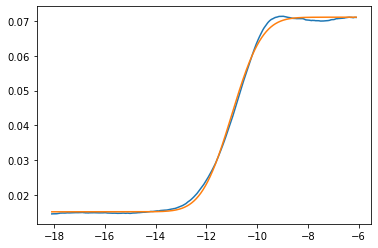

In [28]:
t,V = read_TDS200('waist_x.txt')
t,V = moving_avg(t,V,kernelsize=100)
t,V = t[0:1200], V[0:1200]
plt.plot(t,V)
popt = fit_waist(t,V,2,-11)
print(popt[0]*v_scan)
plt.plot(t,int_gaussian(t,*popt))
plt.show()
